# Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

In [2]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(':', '_').str.replace('/', '_').str.replace('__', '_')
df.replace('?', np.NaN, inplace=True)
df = df.apply(pd.to_numeric) 
df.head()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs_year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds_time_since_first_diagnosis,stds_time_since_last_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 858 non-null    int64  
 1   number_of_sexual_partners           832 non-null    float64
 2   first_sexual_intercourse            851 non-null    float64
 3   num_of_pregnancies                  802 non-null    float64
 4   smokes                              845 non-null    float64
 5   smokes_(years)                      845 non-null    float64
 6   smokes_(packs_year)                 845 non-null    float64
 7   hormonal_contraceptives             750 non-null    float64
 8   hormonal_contraceptives_(years)     750 non-null    float64
 9   iud                                 741 non-null    float64
 10  iud_(years)                         741 non-null    float64
 11  stds                                753 non-n

In [4]:
df.describe()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs_year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds_time_since_first_diagnosis,stds_time_since_last_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### What about Missing Values?

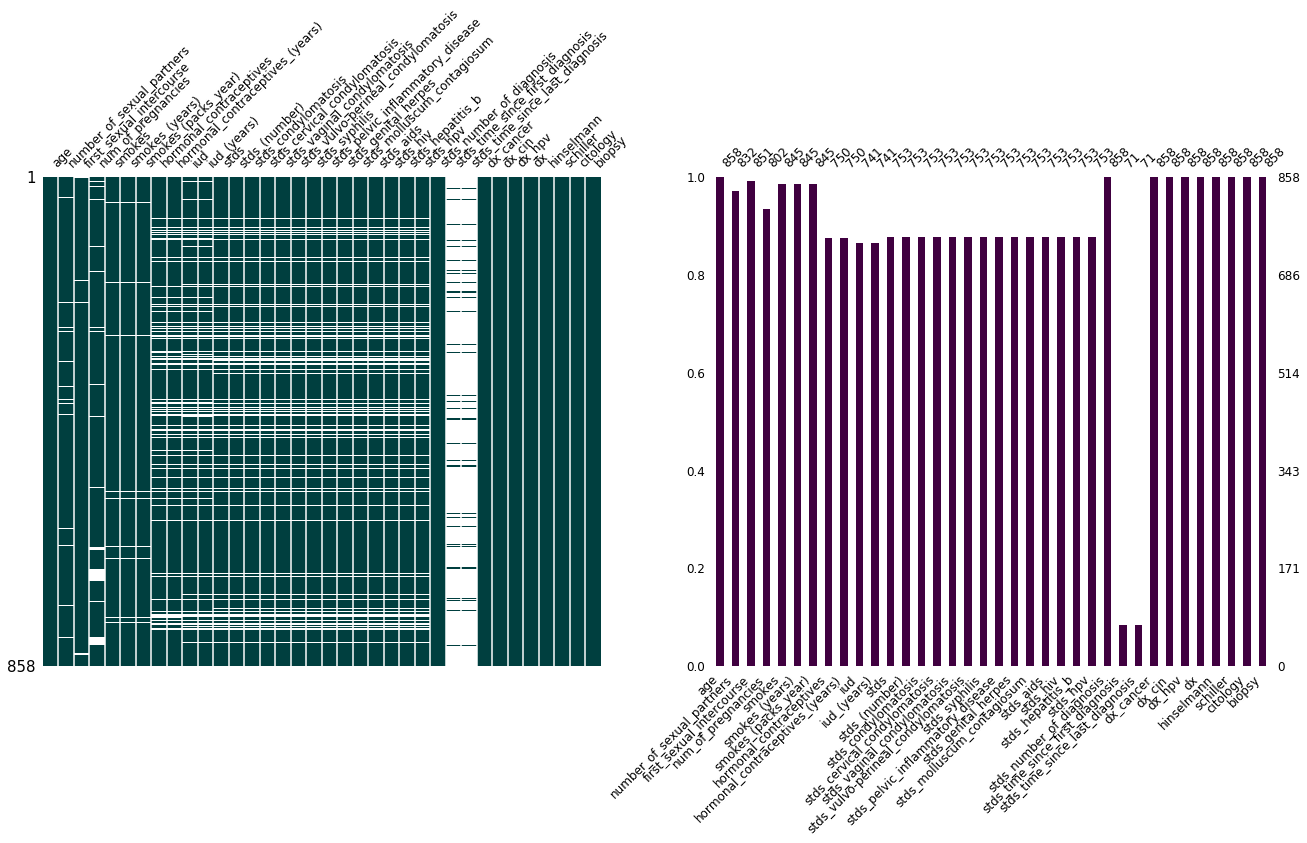

In [5]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,9))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

C:\Users\sumai\Anaconda3\lib\site-packages\missingno\missingno.py:460: UserWarning: The 'inline' argument has been deprecated, and will be removed in a future version of missingno.
  "The 'inline' argument has been deprecated, and will be removed in a future version "


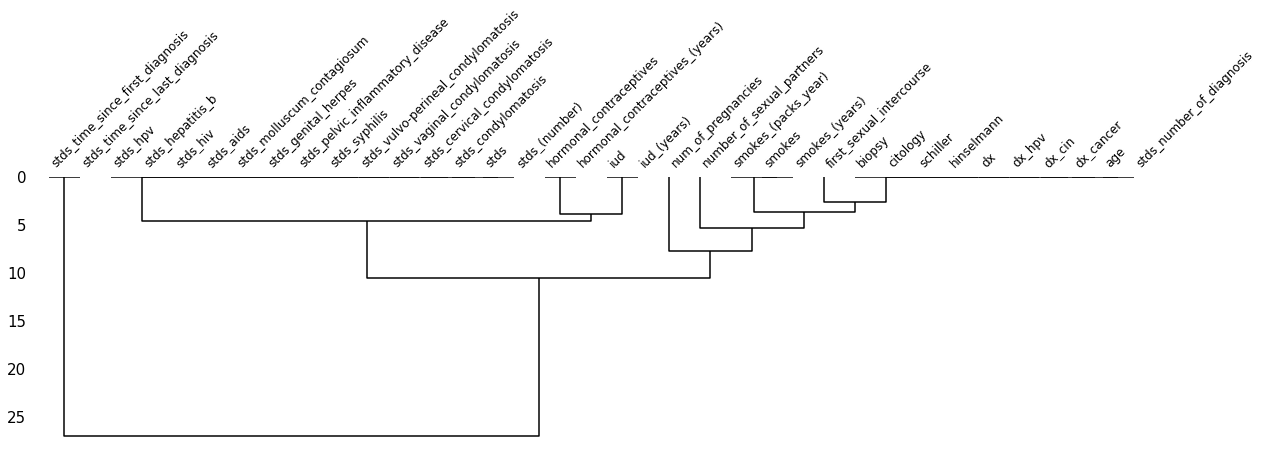

In [6]:
msno.dendrogram(df, inline=True, fontsize=12, figsize=(20, 5))

In [7]:
def dfmiss (df):

    count = df.isnull().sum()

    df_miss = pd.DataFrame(index = df.columns, data =
                     {'data_type': df.dtypes,
                      'unique_values': df.nunique(),
                      'have_null?': df.isnull().any(),
                      'how many?' : count,
                      '%' : count/df.shape[0]*100 })
    return df_miss

miss = dfmiss(df)
miss.to_csv('miss.csv')
miss.head(50)

,data_type,unique_values,have_null?,how many?,%
age,int64,44,False,0,0.000000
number_of_sexual_partners,float64,12,True,26,3.030303
first_sexual_intercourse,float64,21,True,7,0.815851
num_of_pregnancies,float64,11,True,56,6.526807
smokes,float64,2,True,13,1.515152
smokes_(years),float64,30,True,13,1.515152
smokes_(packs_year),float64,62,True,13,1.515152
hormonal_contraceptives,float64,2,True,108,12.587413
hormonal_contraceptives_(years),float64,40,True,108,12.587413
iud,float64,2,True,117,13.636364


### Separating the Continuous and Categorical Features

In [8]:
cols = df.columns.to_list()
cat = []
cont = []

for col in cols:
    if df[col].nunique() < 10:
        cat.append(col)
    else:
        cont.append(col)     

###  Univariate Analysis

#### Categorical Features

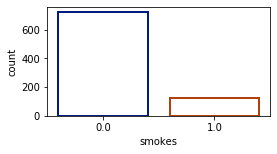

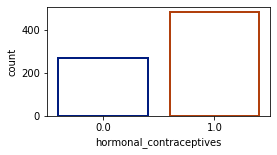

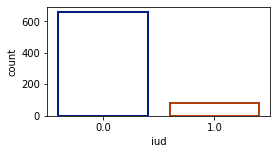

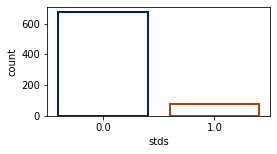

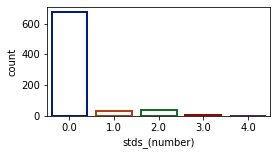

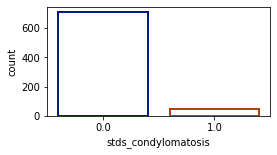

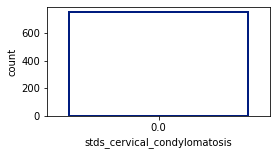

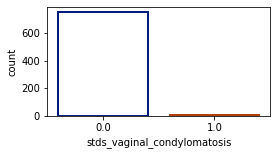

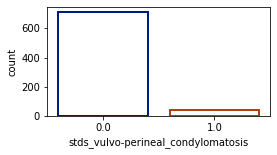

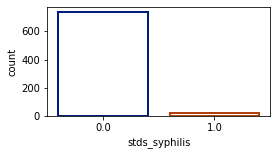

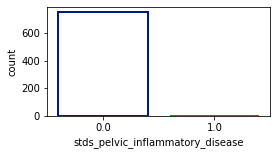

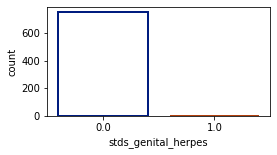

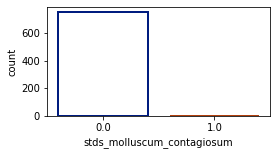

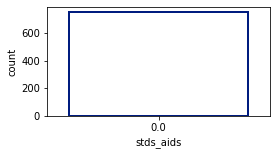

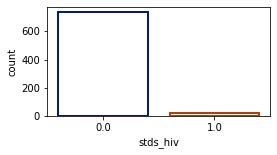

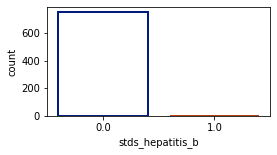

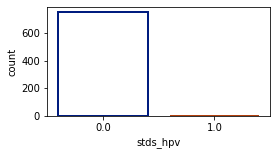

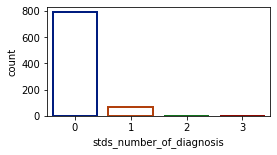

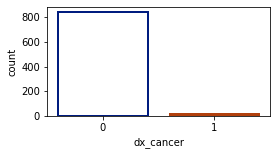

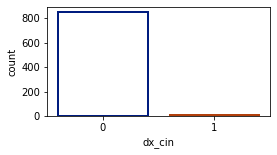

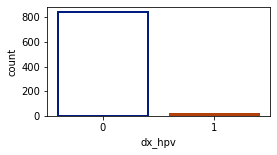

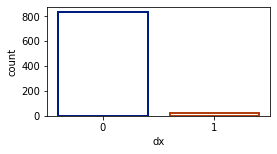

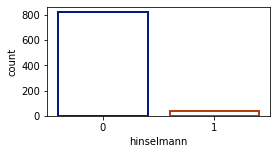

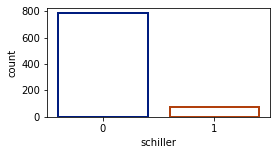

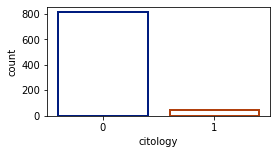

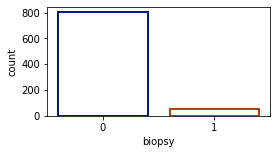

In [9]:
for col in cat:
    plt.figure(figsize=(4, 2))
    ax = sns.countplot(x=col, data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=2,
                   edgecolor=sns.color_palette("dark", 5))
    plt.show()

#### Continuous Features

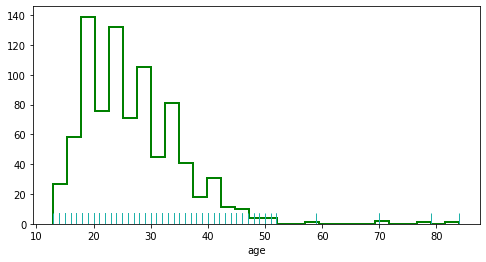

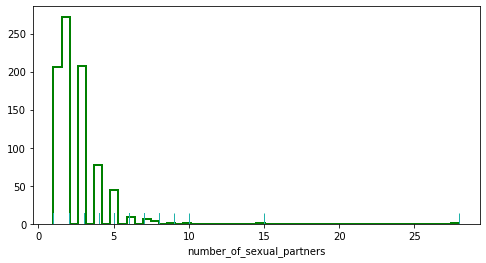

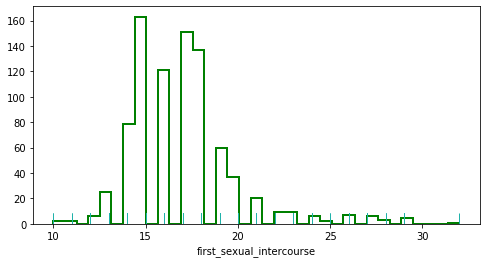

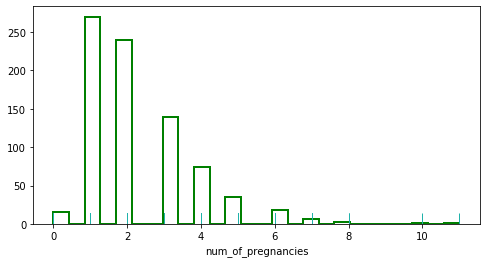

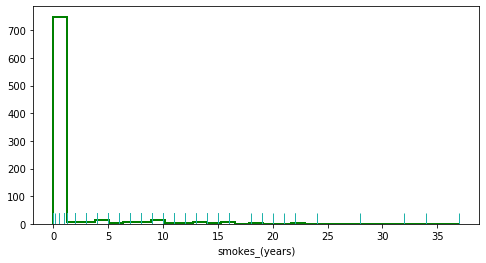

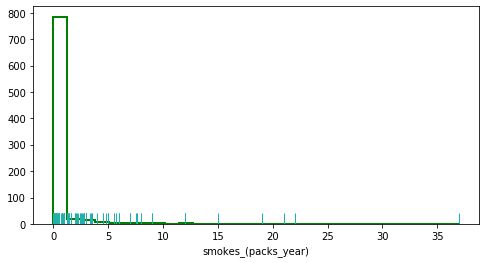

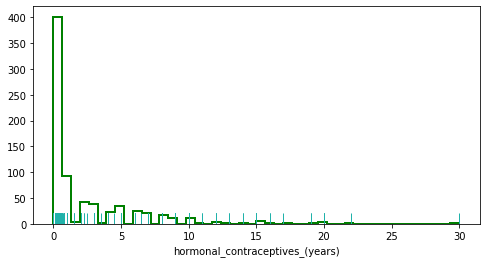

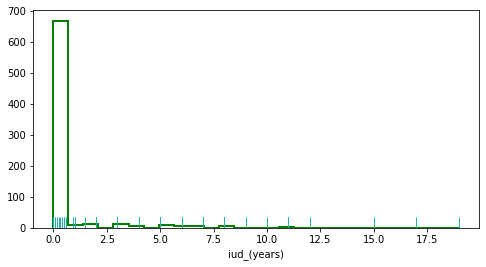

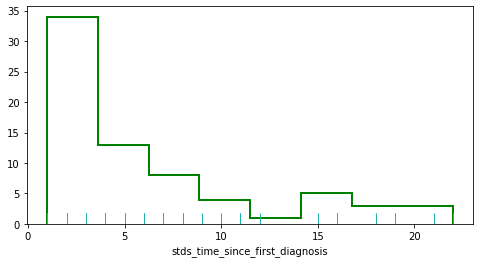

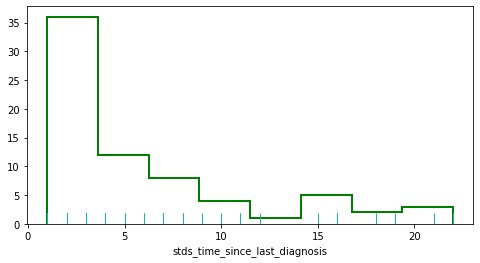

In [10]:
for col in cont:
    plt.figure(figsize=(8, 4))
    sns.distplot(df[col], kde=False, rug=True, rug_kws={"color": "lightseagreen"}, hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "g"})
    plt.xlabel(col)
    plt.show()

### Bivariate Analysis

#### Categorical Features vs Target Variable (Biopsy, Schiller, Citology, Hinselmann)

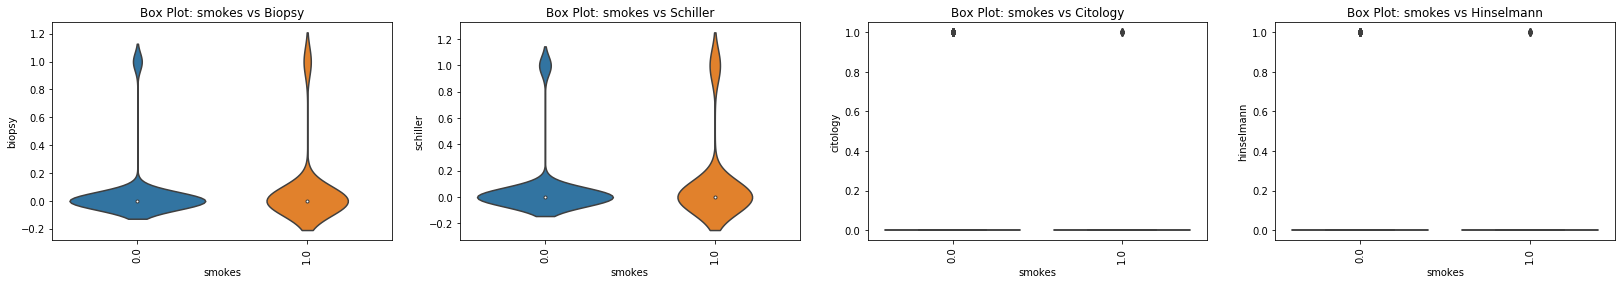

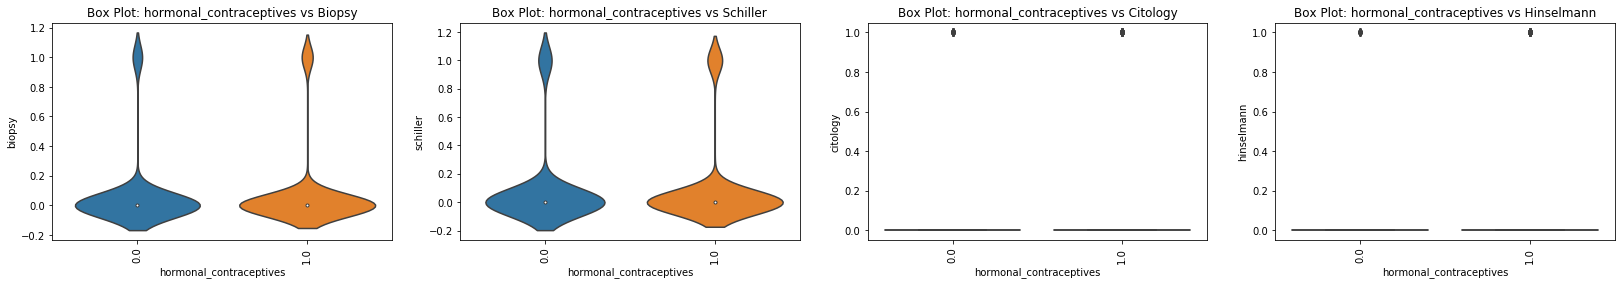

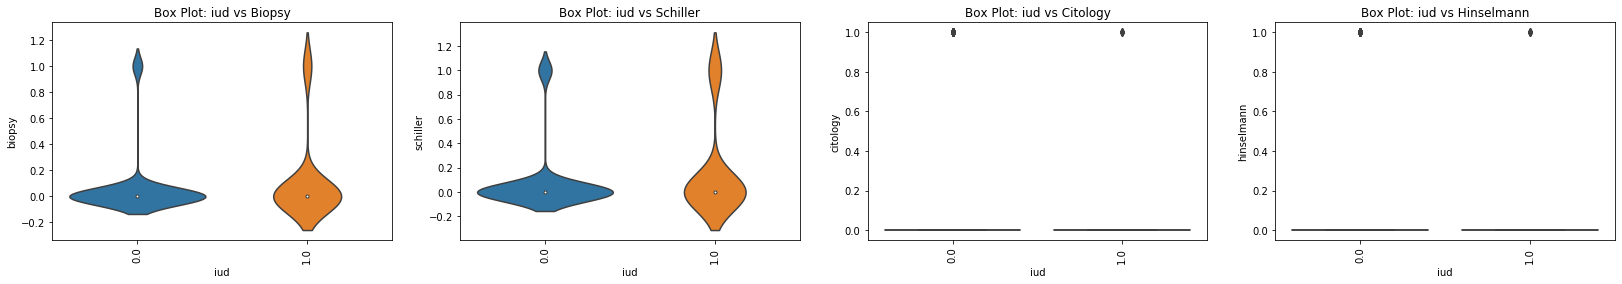

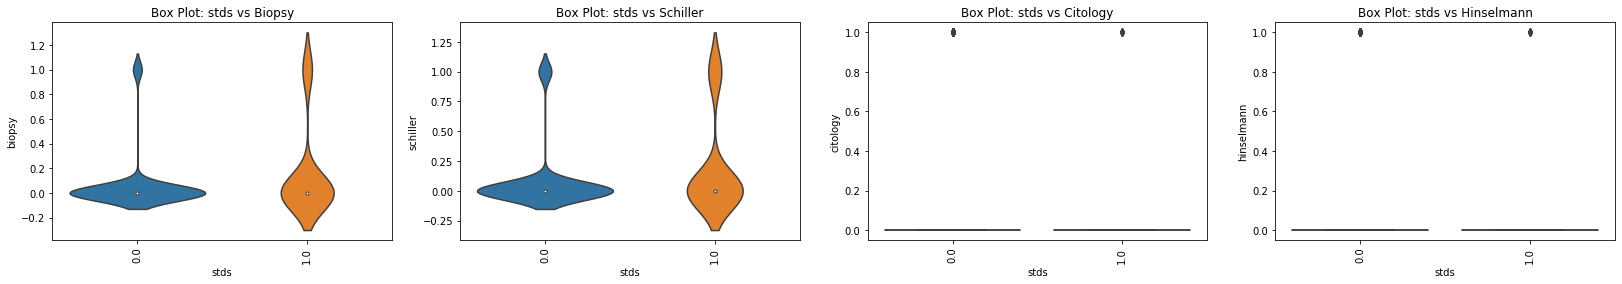

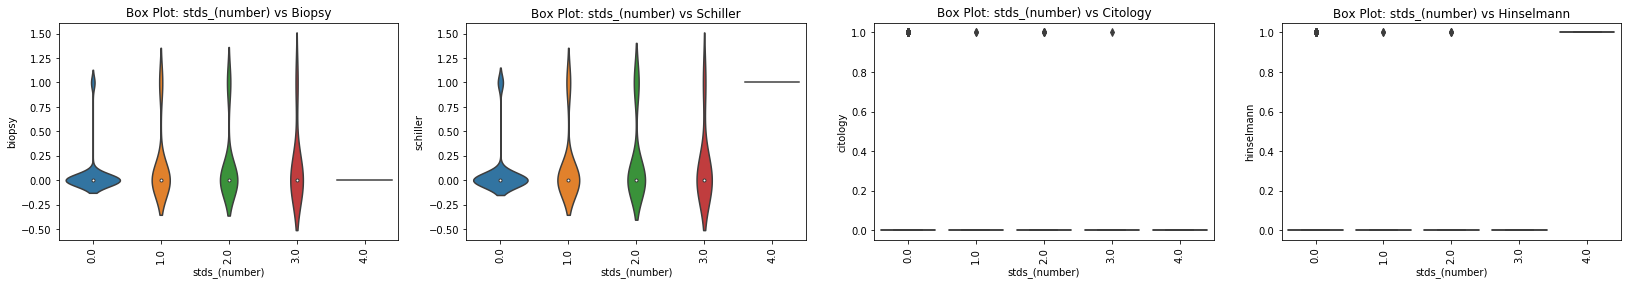

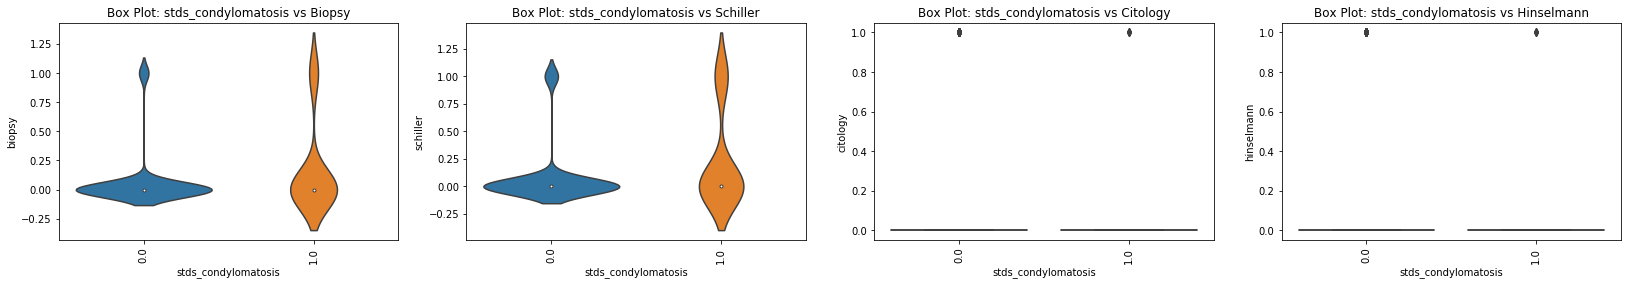

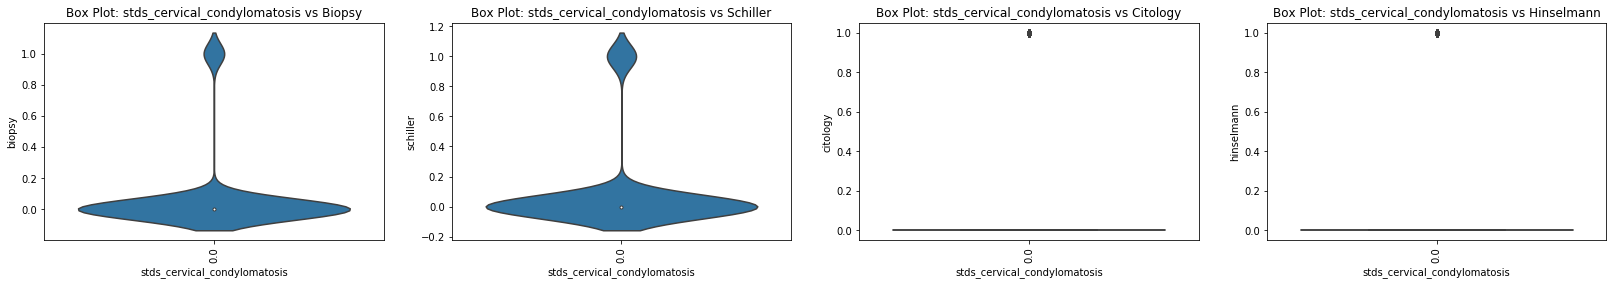

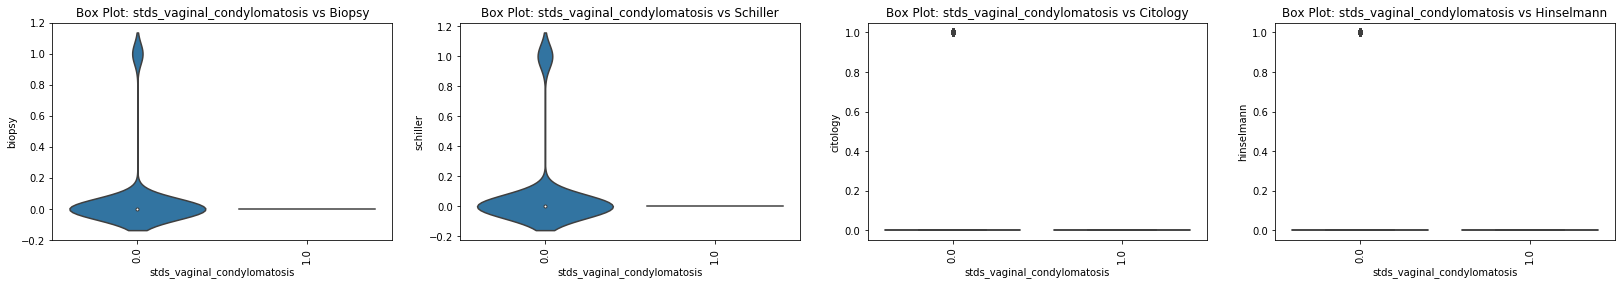

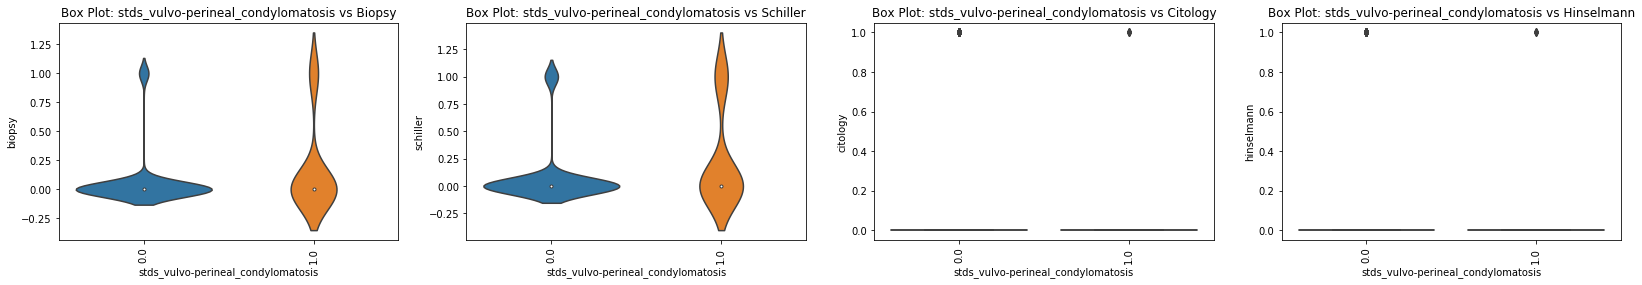

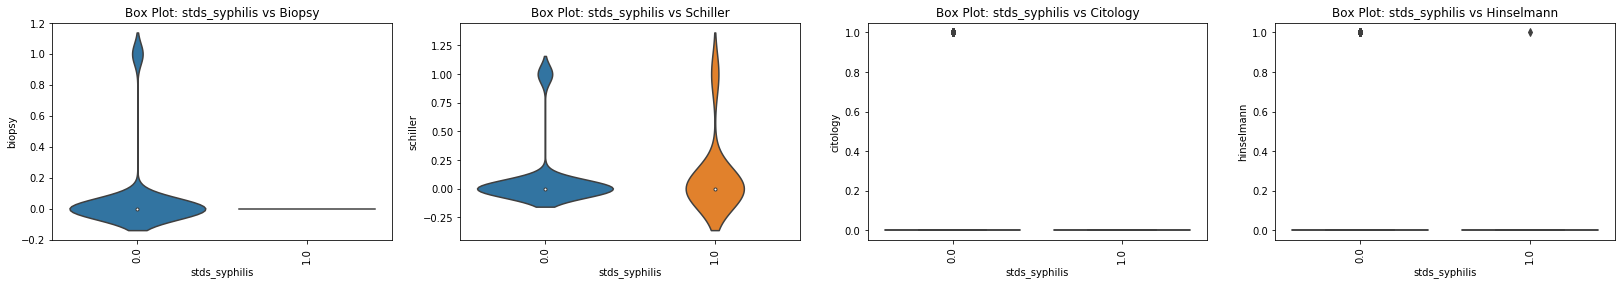

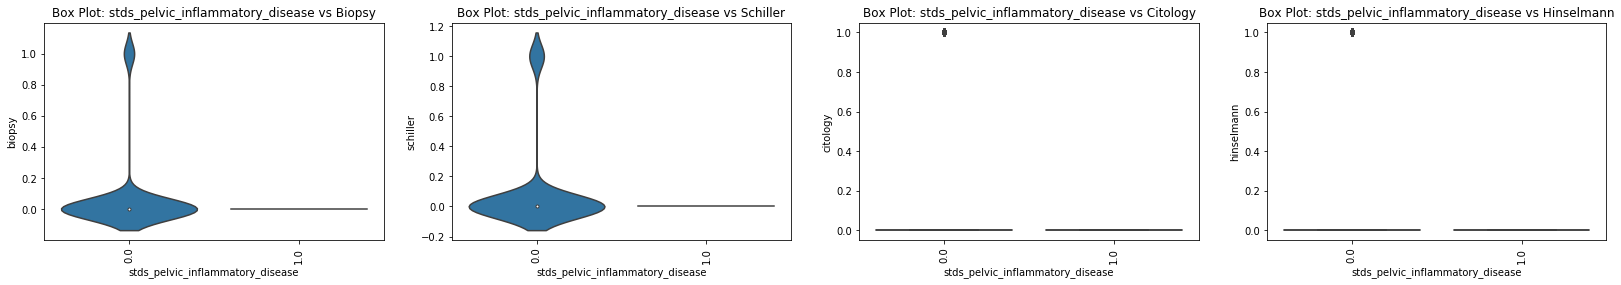

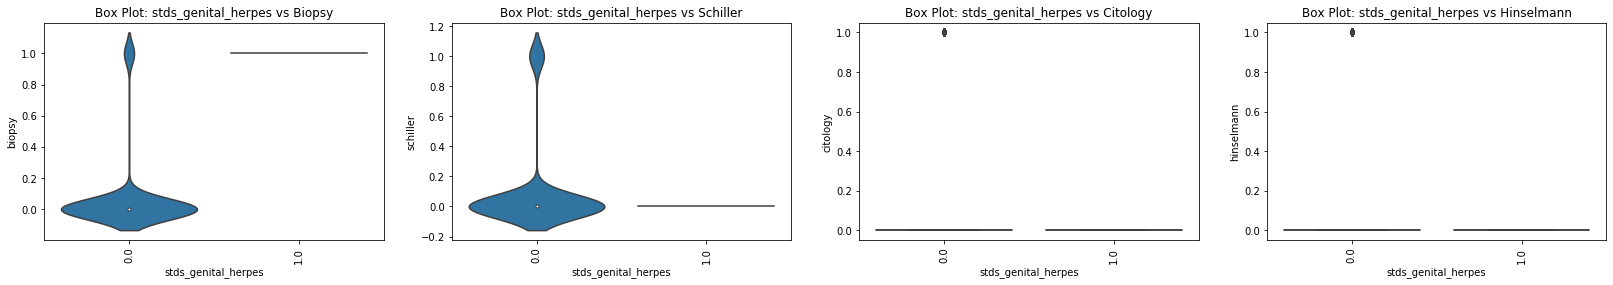

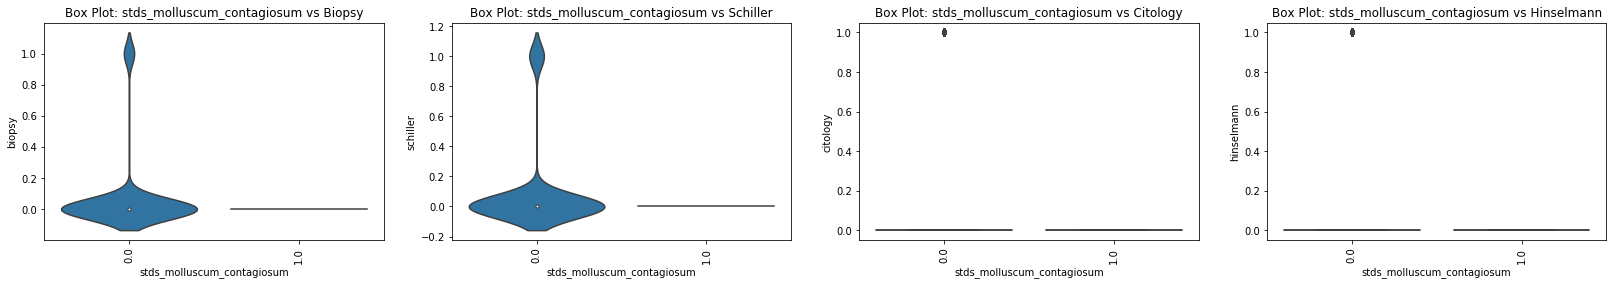

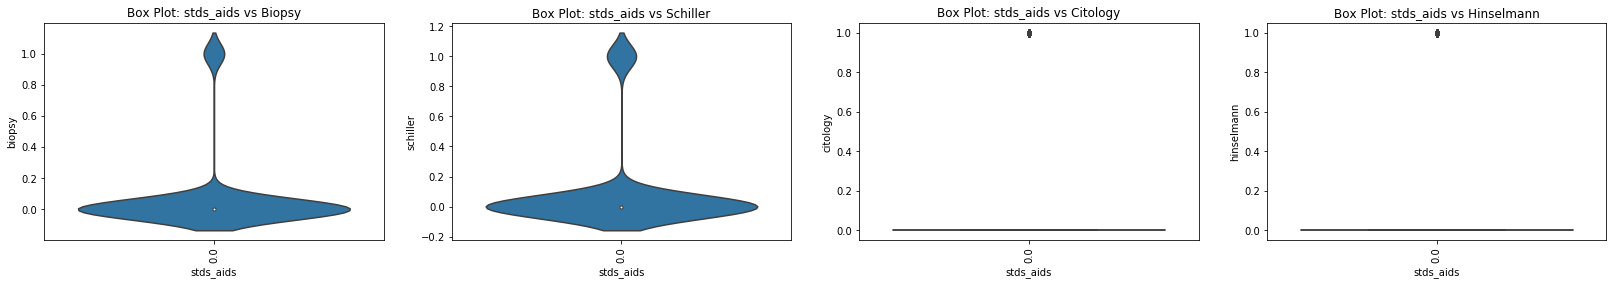

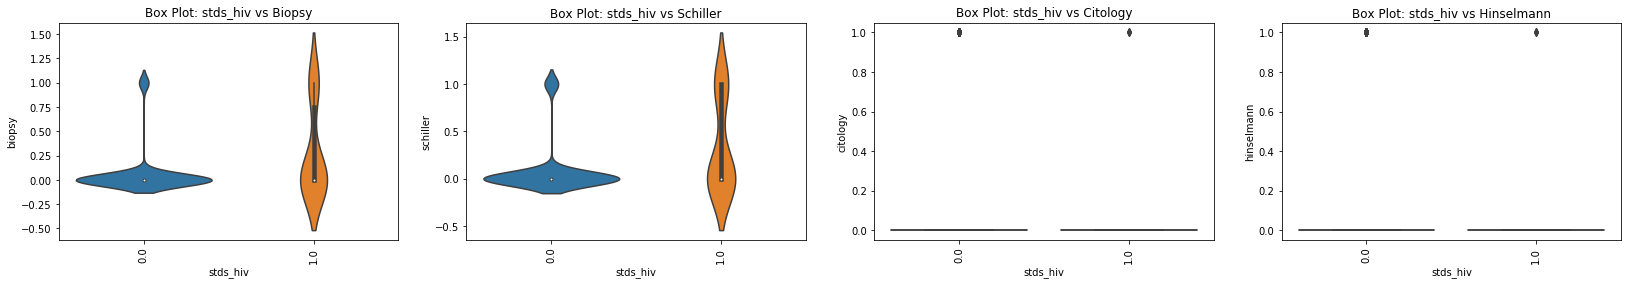

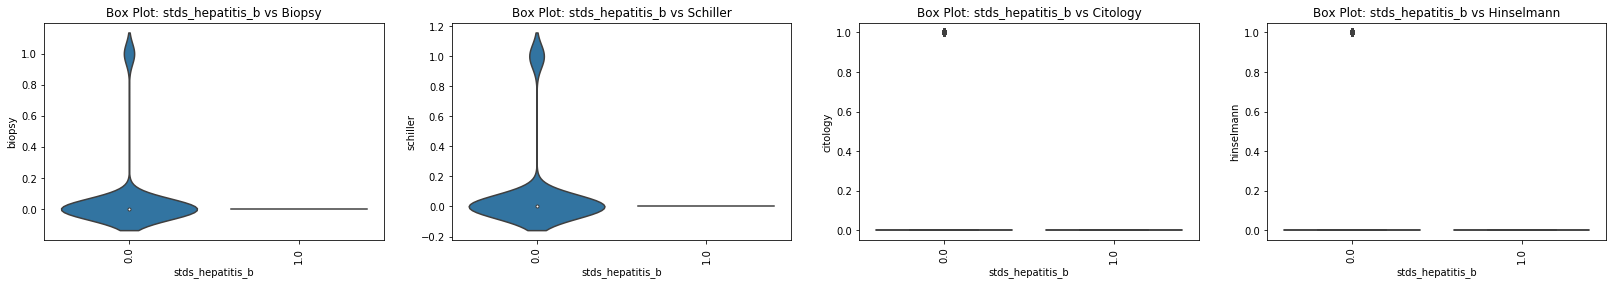

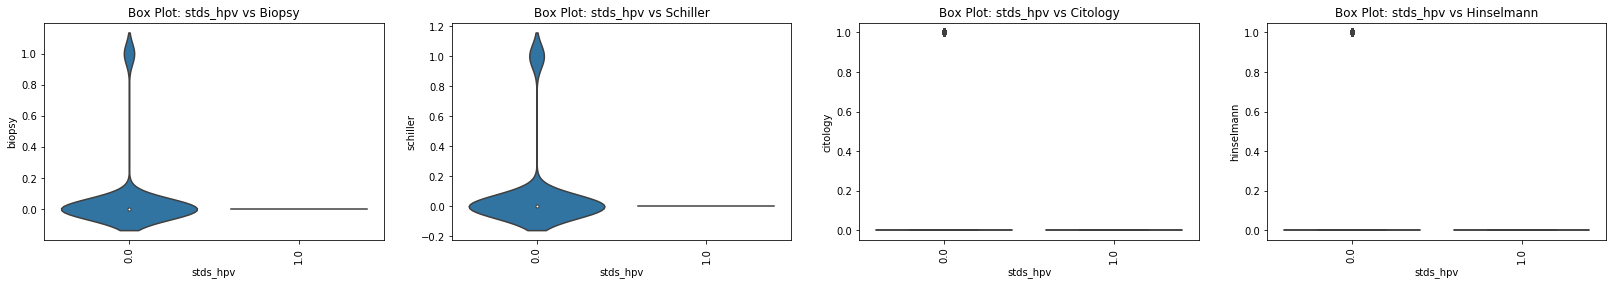

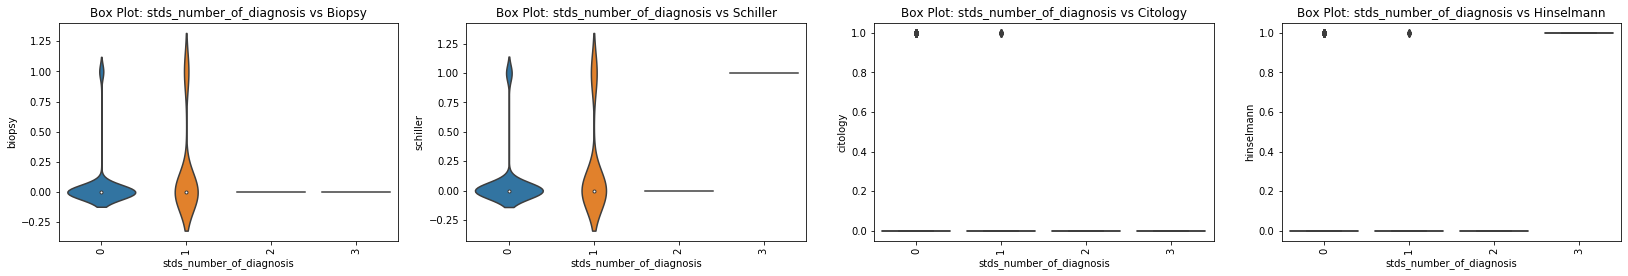

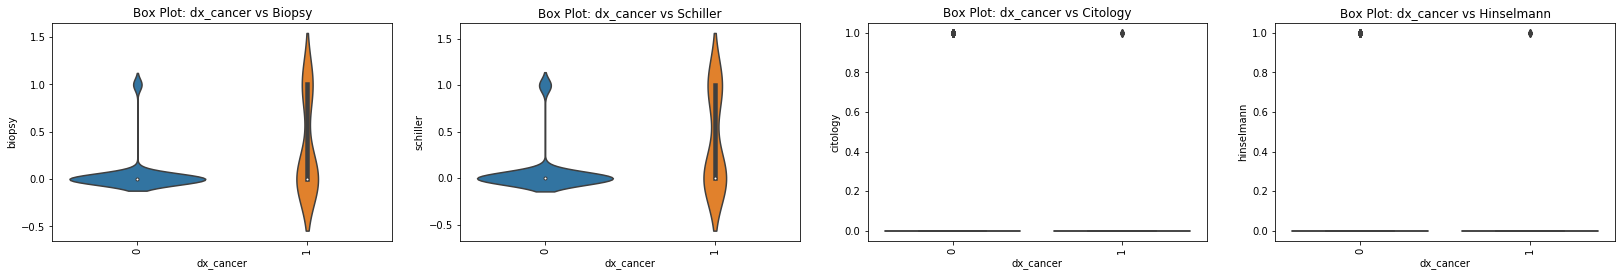

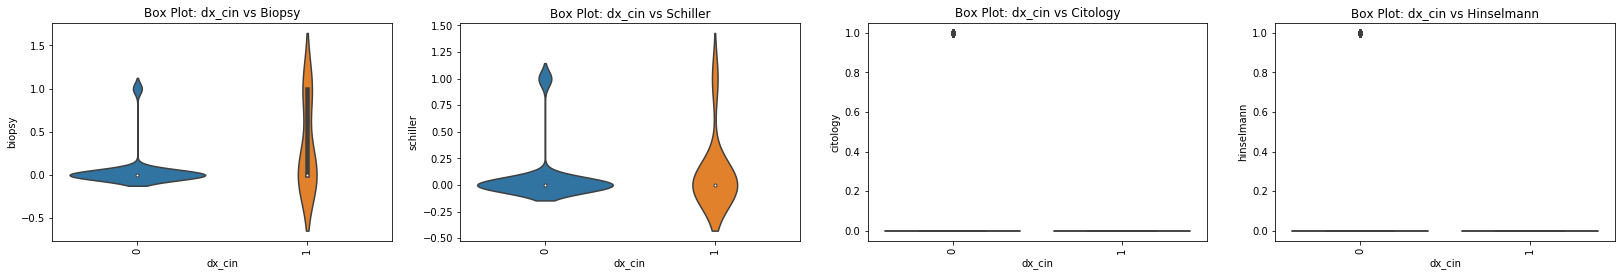

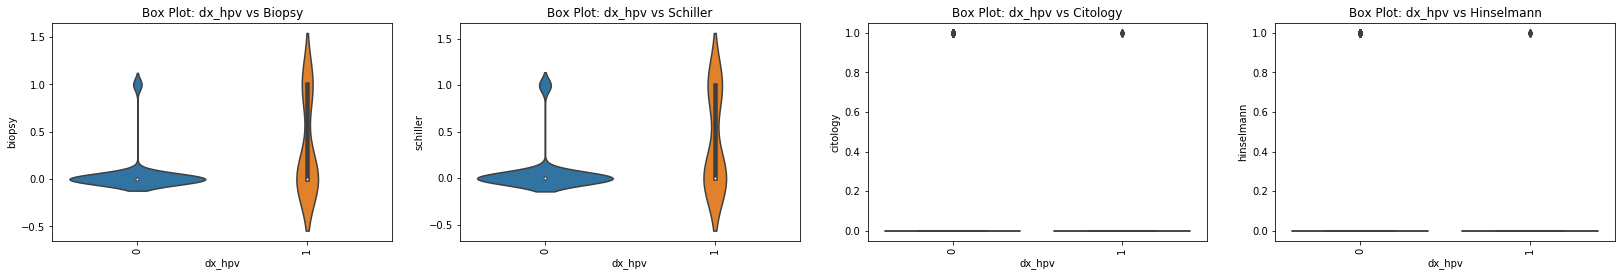

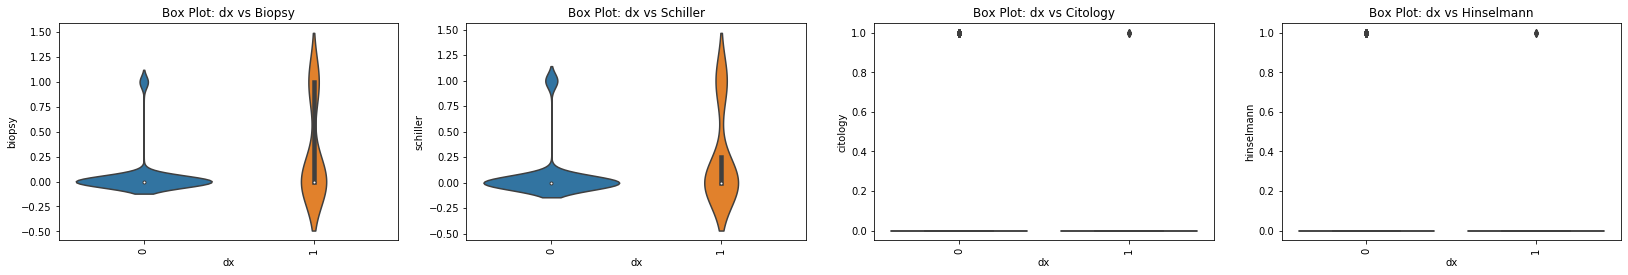

In [11]:
cat = ['smokes',
 'hormonal_contraceptives',
 'iud',
 'stds',
 'stds_(number)',
 'stds_condylomatosis',
 'stds_cervical_condylomatosis',
 'stds_vaginal_condylomatosis',
 'stds_vulvo-perineal_condylomatosis',
 'stds_syphilis',
 'stds_pelvic_inflammatory_disease',
 'stds_genital_herpes',
 'stds_molluscum_contagiosum',
 'stds_aids',
 'stds_hiv',
 'stds_hepatitis_b',
 'stds_hpv',
 'stds_number_of_diagnosis',
 'dx_cancer',
 'dx_cin',
 'dx_hpv',
 'dx']

for col in cat:

    plt.figure(figsize=(28, 4))
    plt.subplot(1,4,1)
    ax = sns.violinplot(x=col, y=df['biopsy'], data=df)
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plt.title('Box Plot: {} vs Biopsy'.format(col))

    plt.subplot(1,4,2)
    ax = sns.violinplot(x=col, y=df['schiller'], data=df)
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plt.title('Box Plot: {} vs Schiller'.format(col))

    plt.subplot(1,4,3)
    ax = sns.boxplot(x=col, y=df['citology'], data=df)
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plt.title('Box Plot: {} vs Citology'.format(col))
    
    plt.subplot(1,4,4)
    ax = sns.boxplot(x=col, y=df['hinselmann'], data=df)
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plt.title('Box Plot: {} vs Hinselmann'.format(col))
    plt.show()

#### Continuous Features vs Target Variable (Biopsy, Schiller, Citology, Hinselmann)

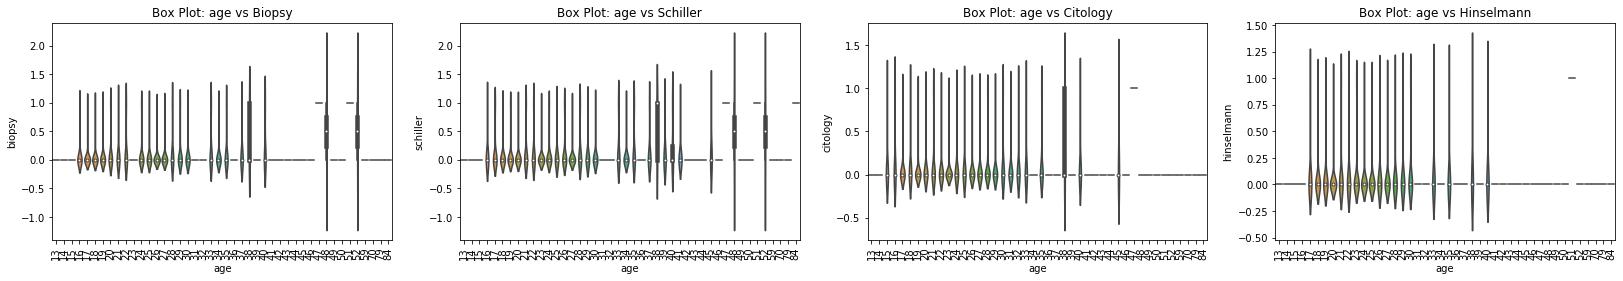

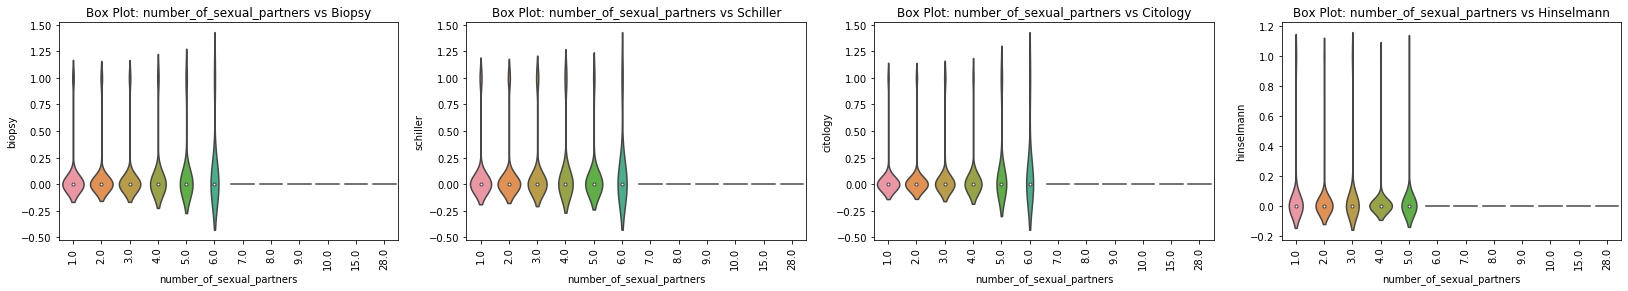

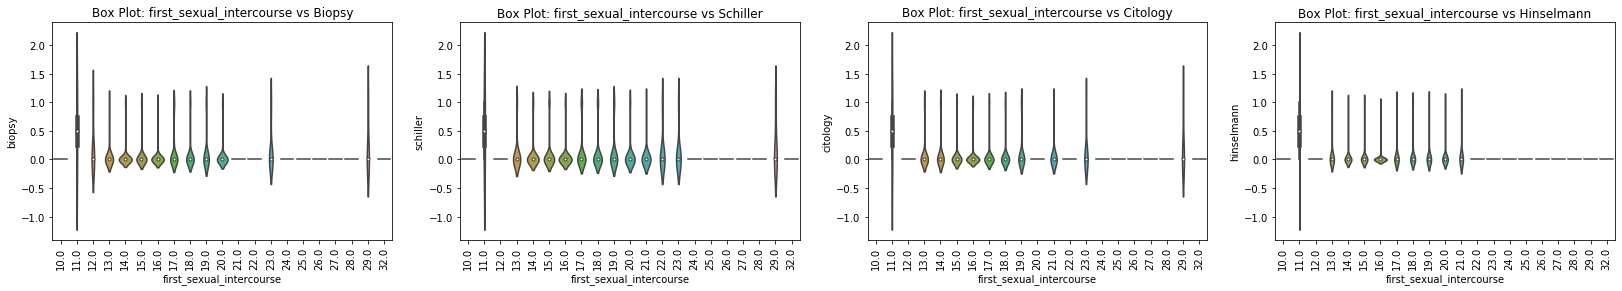

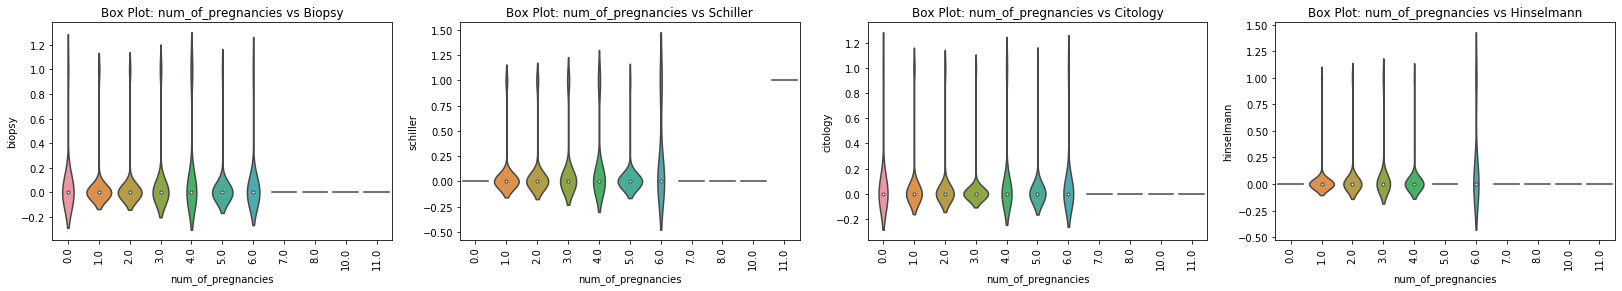

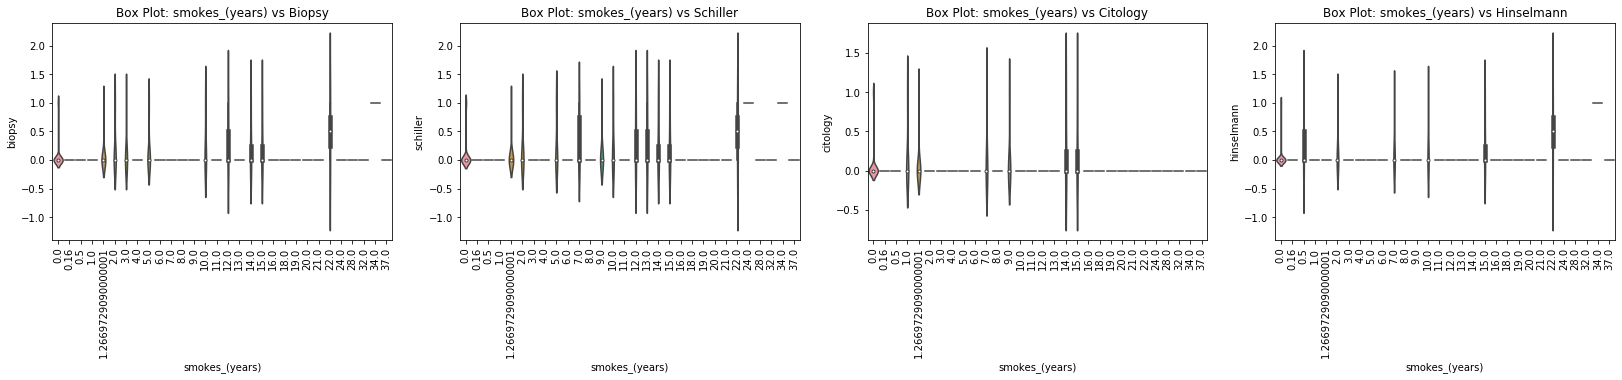

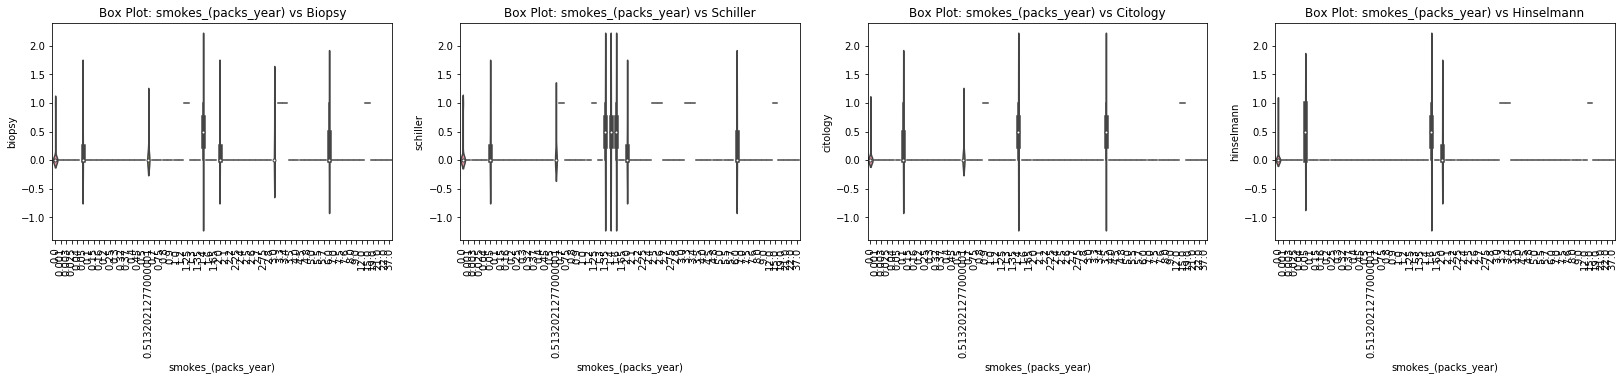

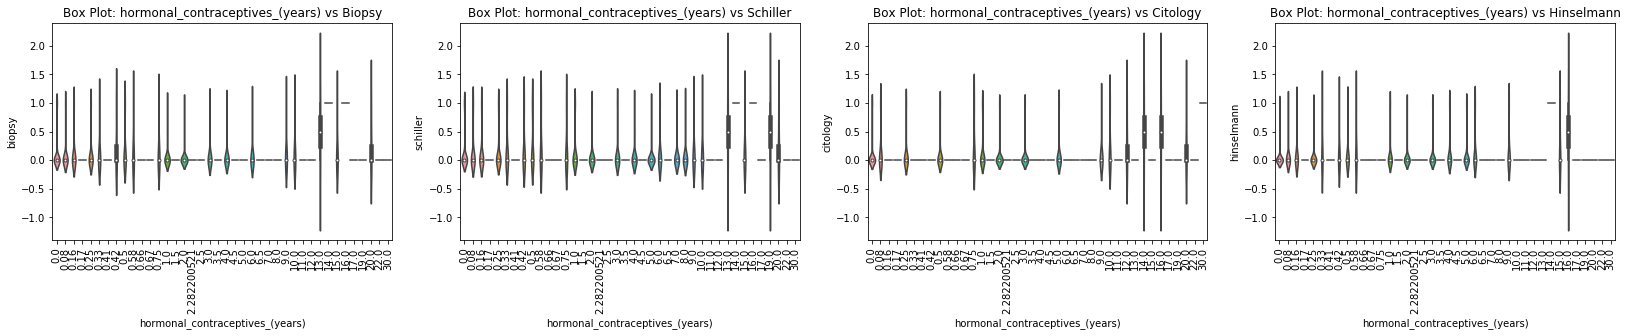

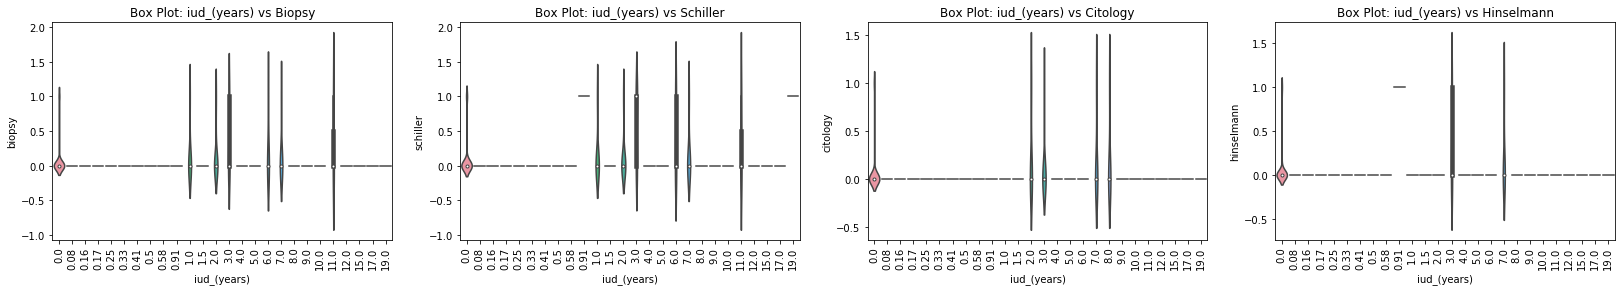

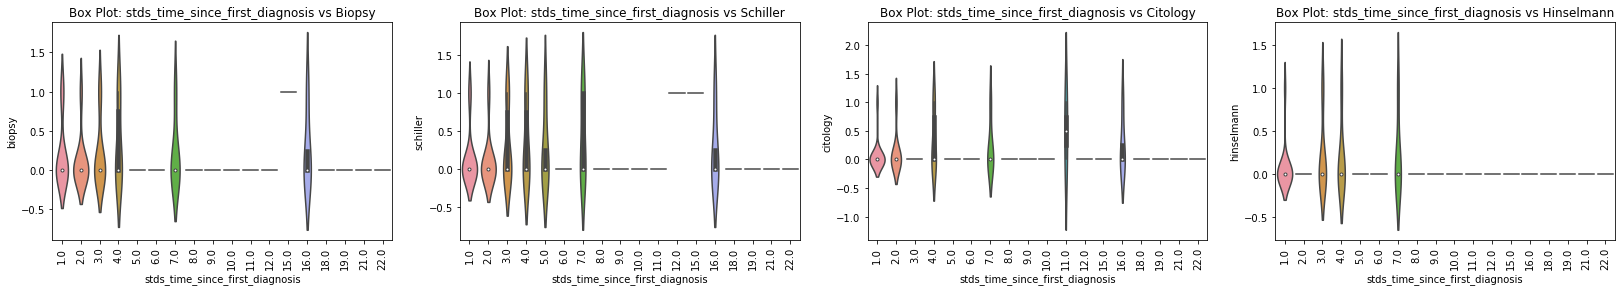

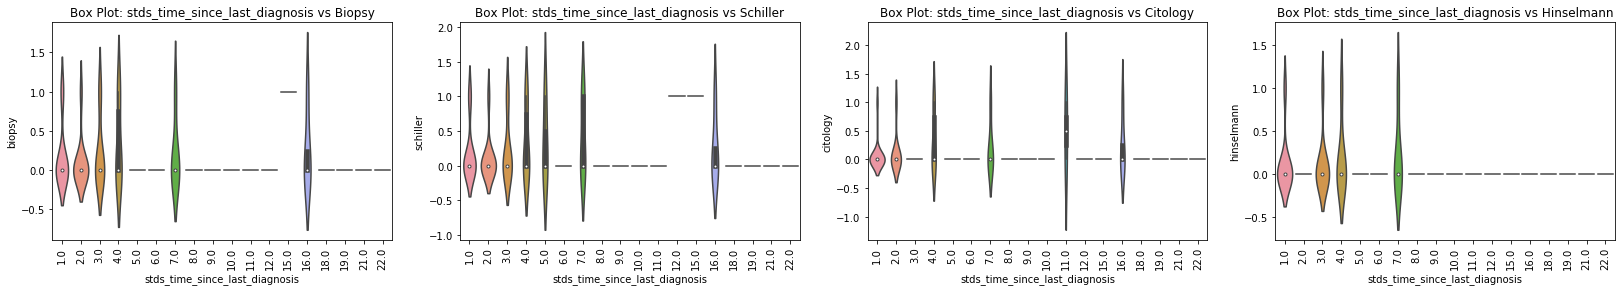

In [12]:
for col in cont:

    
    plt.figure(figsize=(28, 4))
    plt.subplot(1,4,1)
    ax = sns.violinplot(x=col, y=df['biopsy'], data=df)
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plt.title('Box Plot: {} vs Biopsy'.format(col))

    plt.subplot(1,4,2)
    ax = sns.violinplot(x=col, y=df['schiller'], data=df)
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plt.title('Box Plot: {} vs Schiller'.format(col))

    plt.subplot(1,4,3)
    ax = sns.violinplot(x=col, y=df['citology'], data=df)
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plt.title('Box Plot: {} vs Citology'.format(col))
    
    plt.subplot(1,4,4)
    ax = sns.violinplot(x=col, y=df['hinselmann'], data=df)
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plt.title('Box Plot: {} vs Hinselmann'.format(col))
    plt.show()

#### Interesting Obsevation between Continuous Features and Target Variables

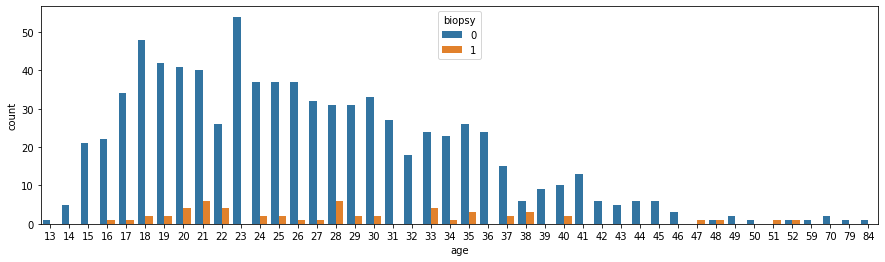

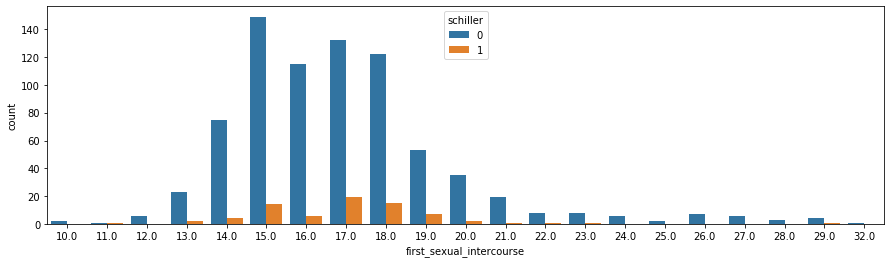

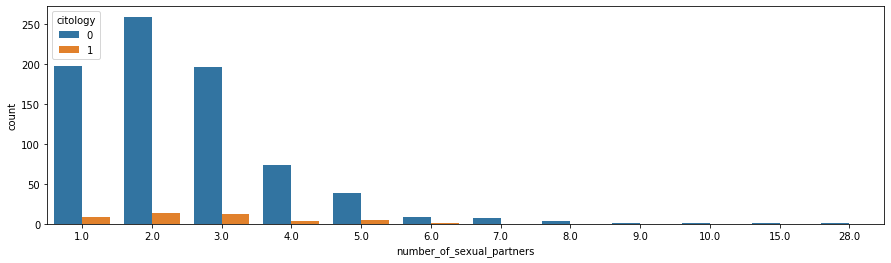

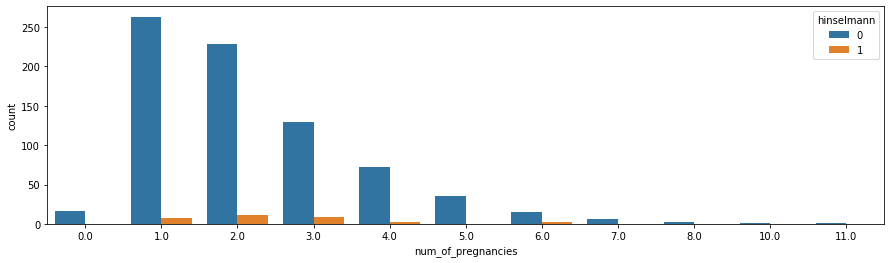

In [13]:
plt.figure(figsize=(15, 4))
sns.countplot(x="age", hue="biopsy", data=df)
plt.show()

plt.figure(figsize=(15, 4))
sns.countplot(x="first_sexual_intercourse", hue="schiller", data=df)
plt.show()

plt.figure(figsize=(15, 4))
sns.countplot(x="number_of_sexual_partners", hue="citology", data=df)
plt.show()

plt.figure(figsize=(15, 4))
sns.countplot(x="num_of_pregnancies", hue="hinselmann", data=df)
plt.show()

### Multivariate Analysis

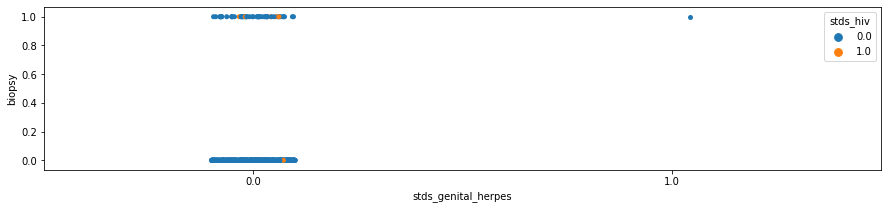

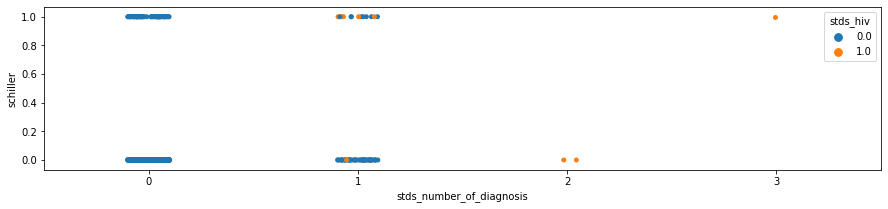

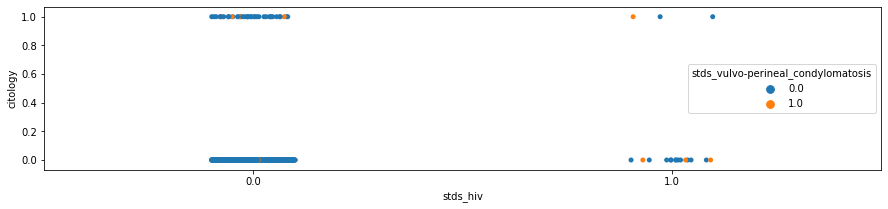

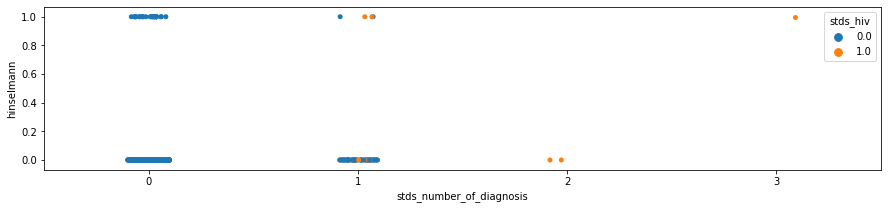

In [14]:
plt.figure(figsize=(15, 3))
ax = sns.stripplot(x="stds_genital_herpes", y='biopsy', hue="stds_hiv", data=df)
plt.show()

plt.figure(figsize=(15, 3))
ax = sns.stripplot(x="stds_number_of_diagnosis", y='schiller', hue="stds_hiv", data=df)
plt.show()

plt.figure(figsize=(15, 3))
ax = sns.stripplot(x="stds_hiv", y='citology', hue="stds_vulvo-perineal_condylomatosis", data=df)
plt.show()

plt.figure(figsize=(15, 3))
ax = sns.stripplot(x="stds_number_of_diagnosis", y='hinselmann', hue="stds_hiv", data=df)
plt.show()

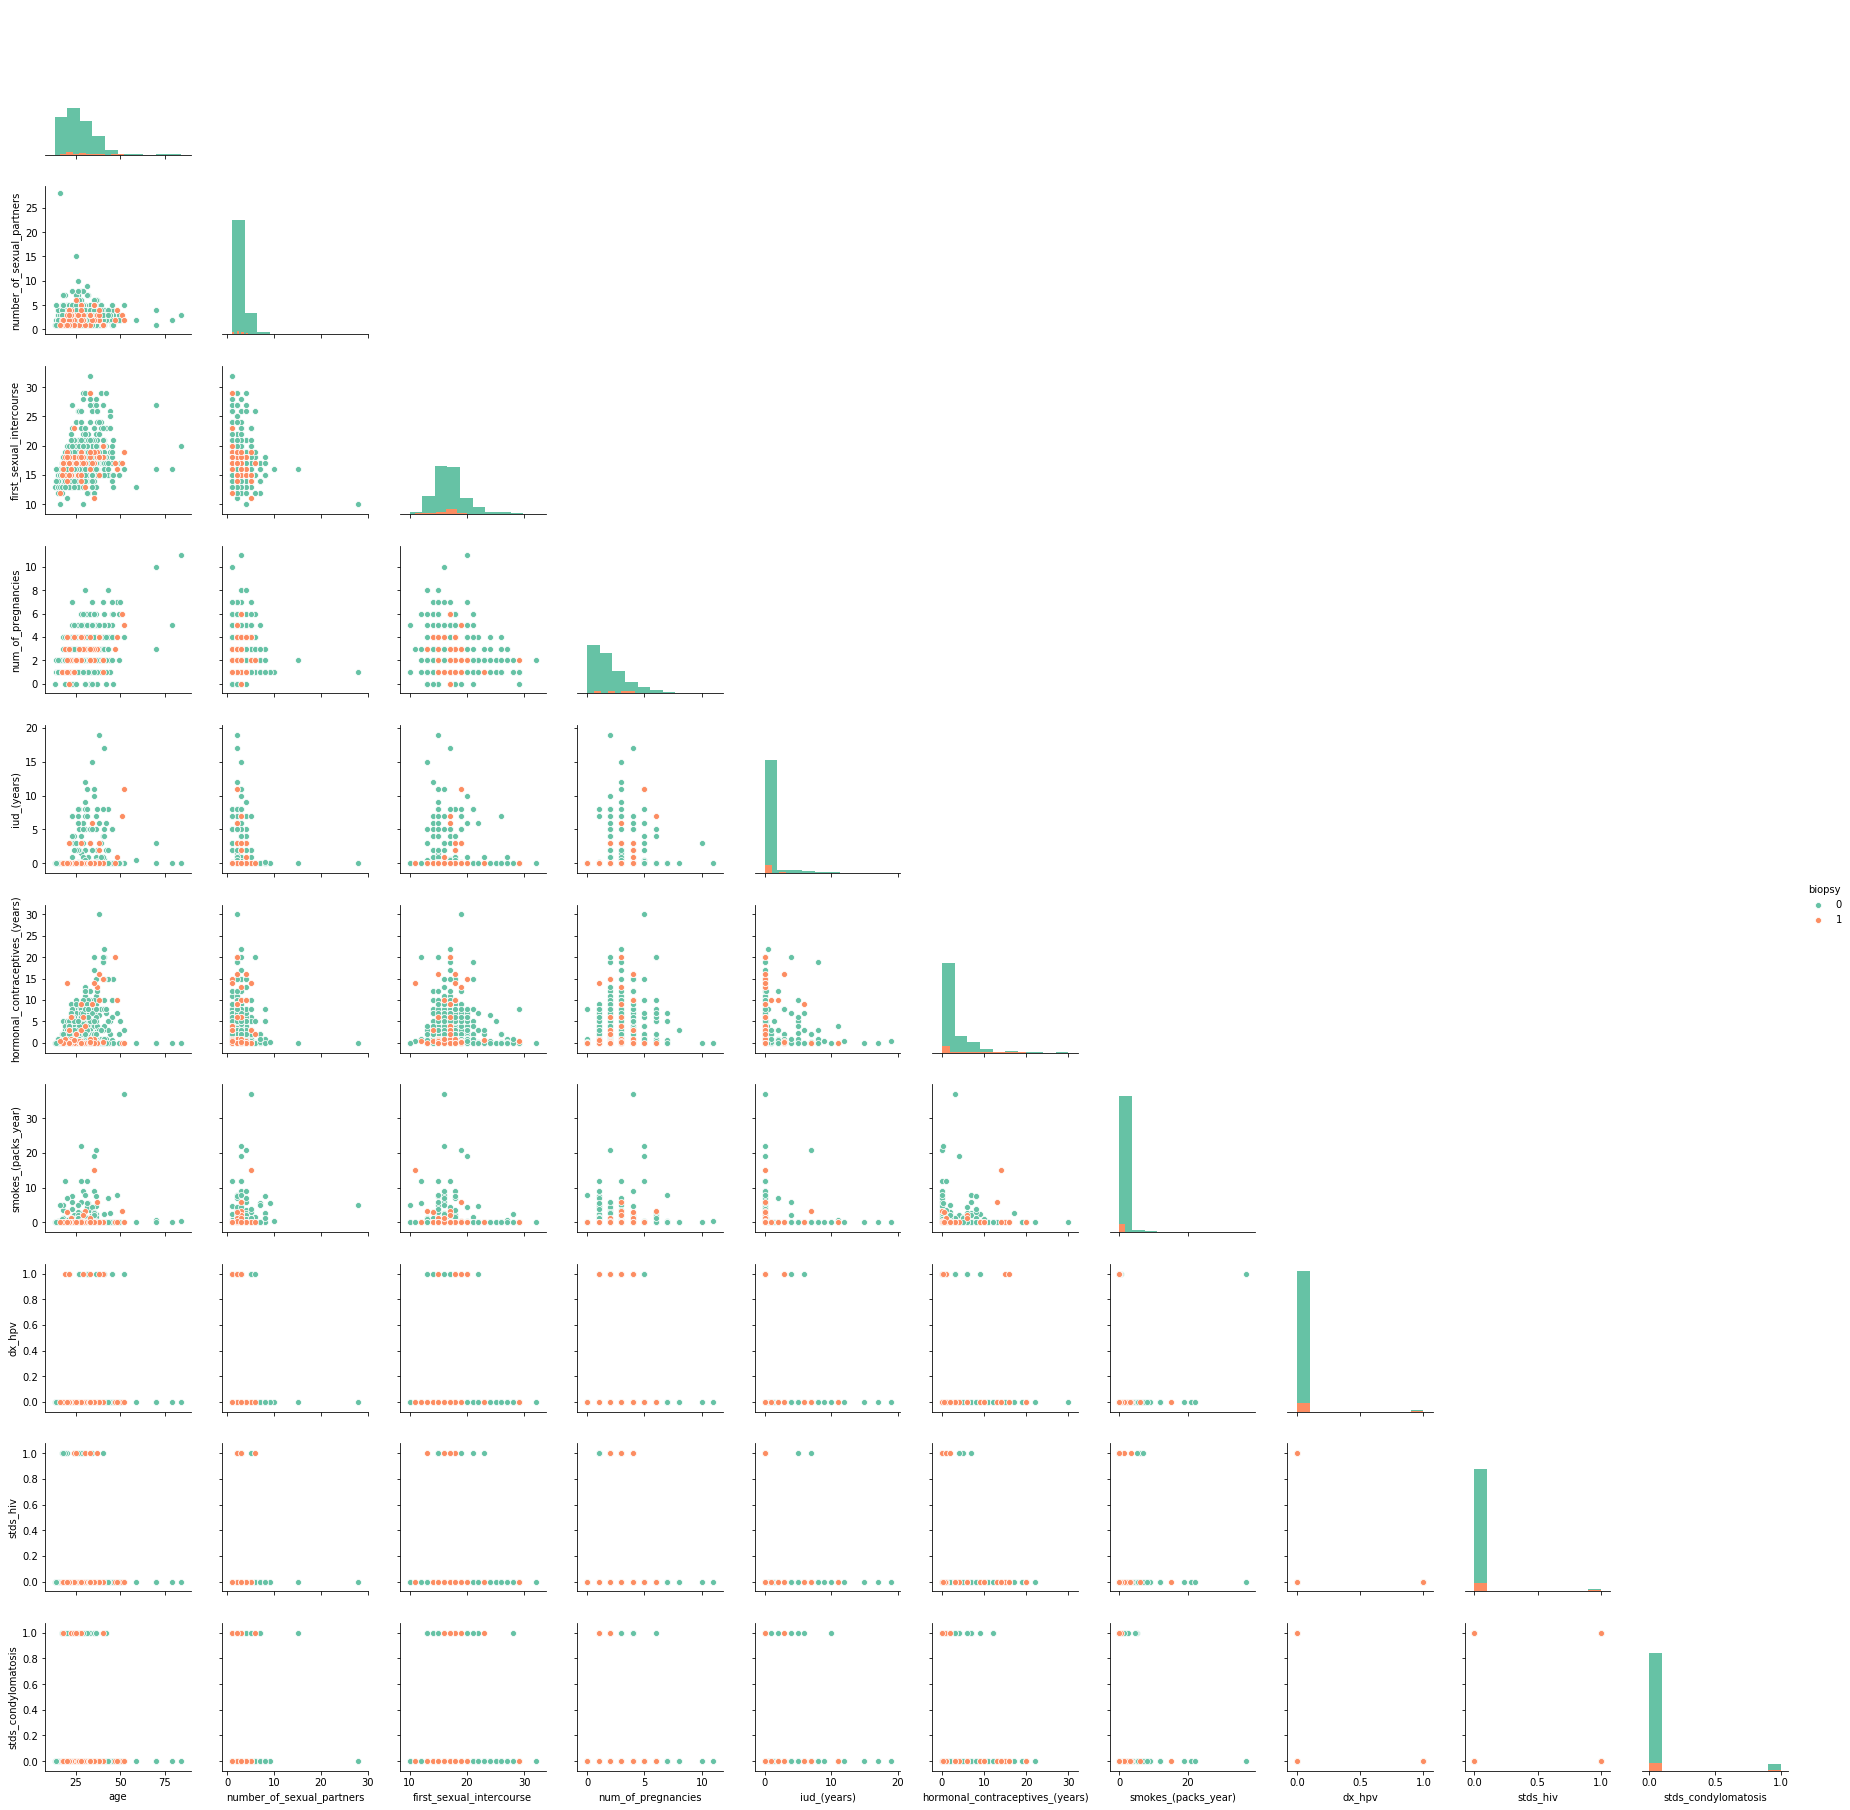

In [15]:
features  = ["age","number_of_sexual_partners","first_sexual_intercourse",
"num_of_pregnancies", 'iud_(years)', "hormonal_contraceptives_(years)", "smokes_(packs_year)", "dx_hpv", "stds_hiv", "stds_condylomatosis", 'biopsy']

df_pairplot = df[features]

sns.pairplot(df_pairplot, hue="biopsy", diag_kind="hist", corner=True, palette = 'Set2')

### Corelation between the features

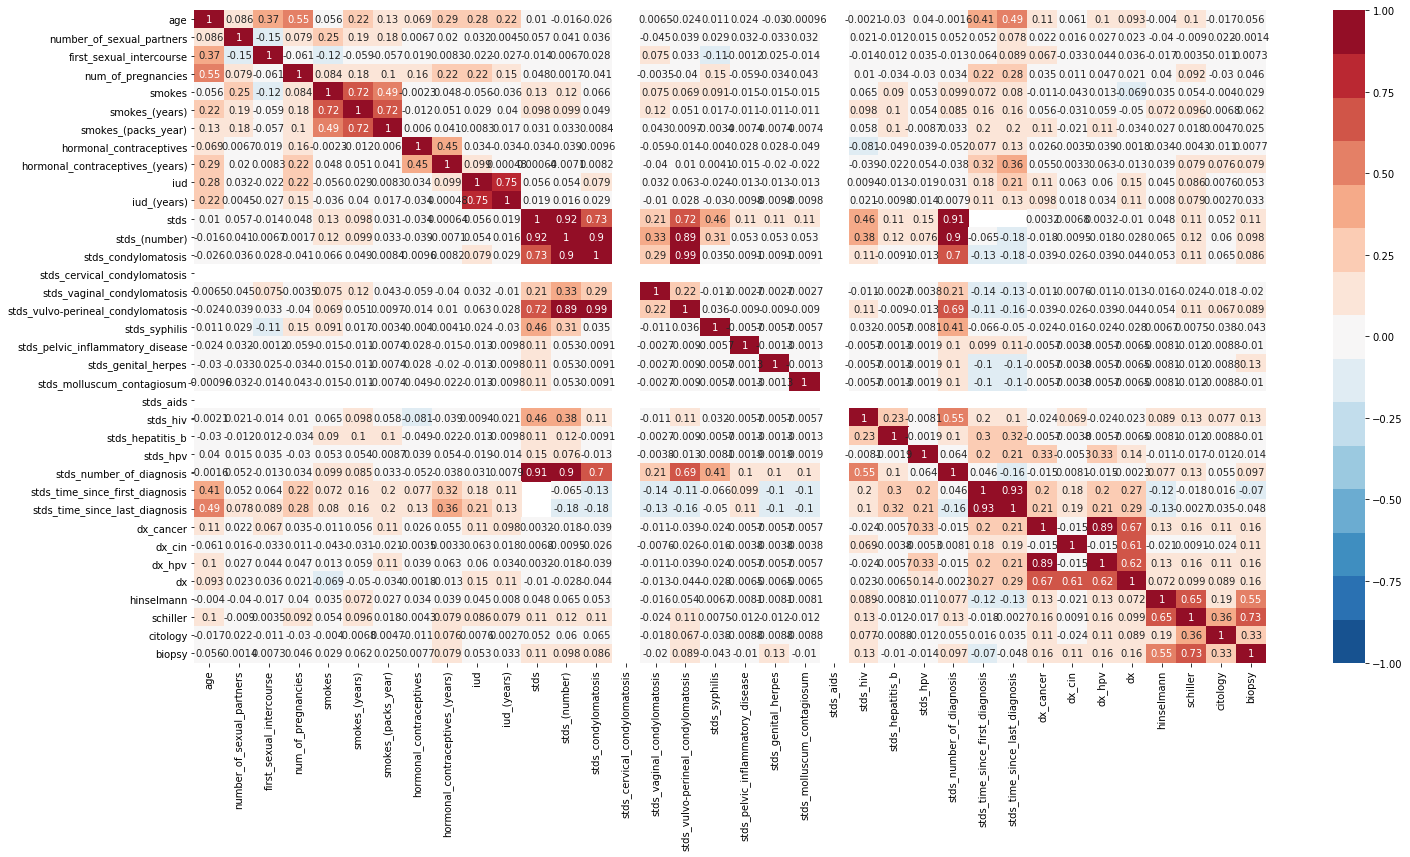

In [16]:
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(method='pearson'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

In [17]:
df_generic = df[["age",
"number_of_sexual_partners",
"first_sexual_intercourse",
"num_of_pregnancies",
"hinselmann",
"schiller",
"citology",
"biopsy"]]

df_iud = df[[
"iud",
"iud_(years)", 
"hinselmann",
"schiller",
"citology",
"biopsy"]]

df_hormonal = df[[
"hormonal_contraceptives",
"hormonal_contraceptives_(years)", 
"hinselmann",
"schiller",
"citology",
"biopsy"]]

df_smokes = df[[
"smokes",
"smokes_(years)",
"smokes_(packs_year)", 
"hinselmann",
"schiller",
"citology",
"biopsy"]]

df_dx = df[[
"dx_cancer",
"dx_cin",
"dx_hpv",
"dx", 
"hinselmann",
"schiller",
"citology",
"biopsy"]]

df_stds = df[[
"stds",
"stds_(number)",
"stds_condylomatosis",
"stds_vaginal_condylomatosis",
"stds_vulvo-perineal_condylomatosis",
"stds_syphilis",
"stds_pelvic_inflammatory_disease",
"stds_genital_herpes",
"stds_molluscum_contagiosum",
"stds_hiv",
"stds_hepatitis_b",
"stds_hpv",
"stds_number_of_diagnosis", 
"hinselmann",
"schiller",
"citology",
"biopsy"]]

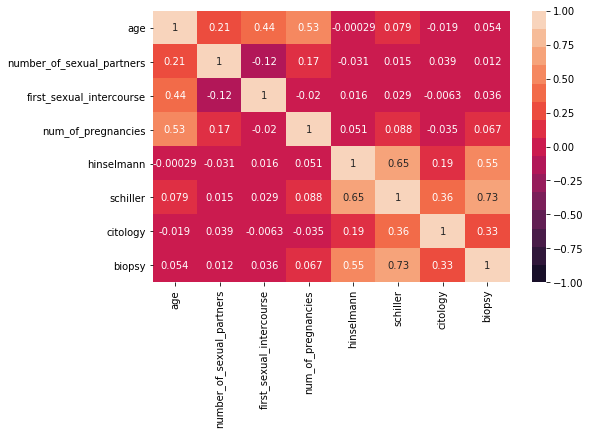

In [18]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_generic.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("rocket", 15))
plt.show()

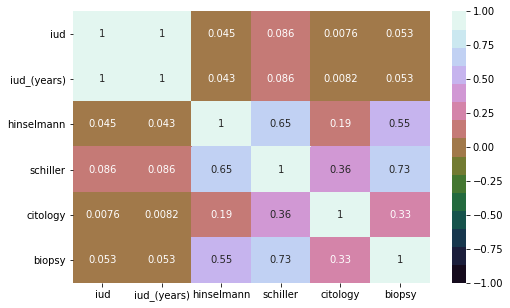

In [19]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_iud.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("cubehelix", 15))
plt.show()

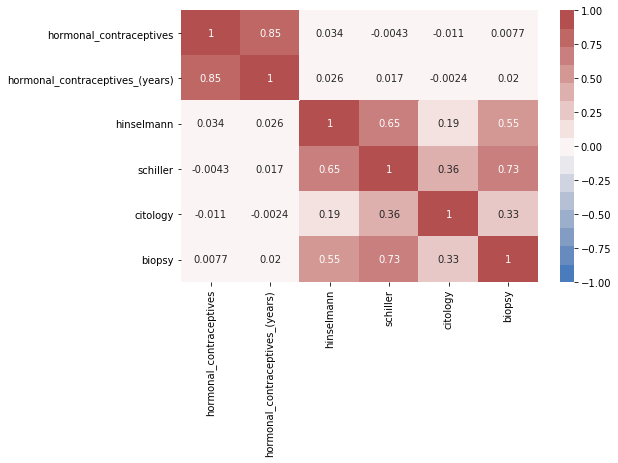

In [20]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_hormonal.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("vlag", 15))
plt.show()

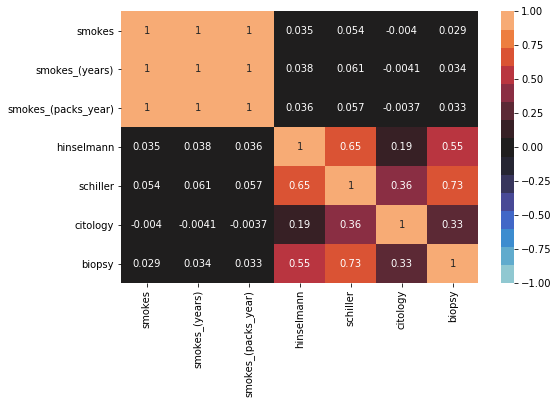

In [21]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_smokes.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("icefire", 15))
plt.show()

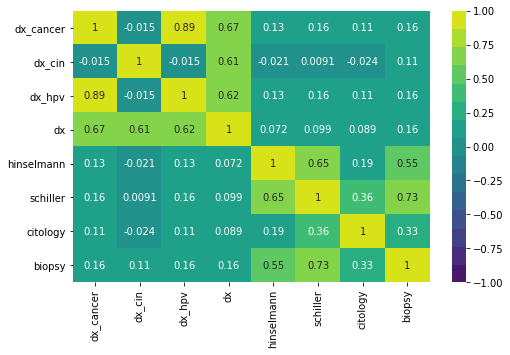

In [22]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_dx.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("viridis", 15))
plt.show()

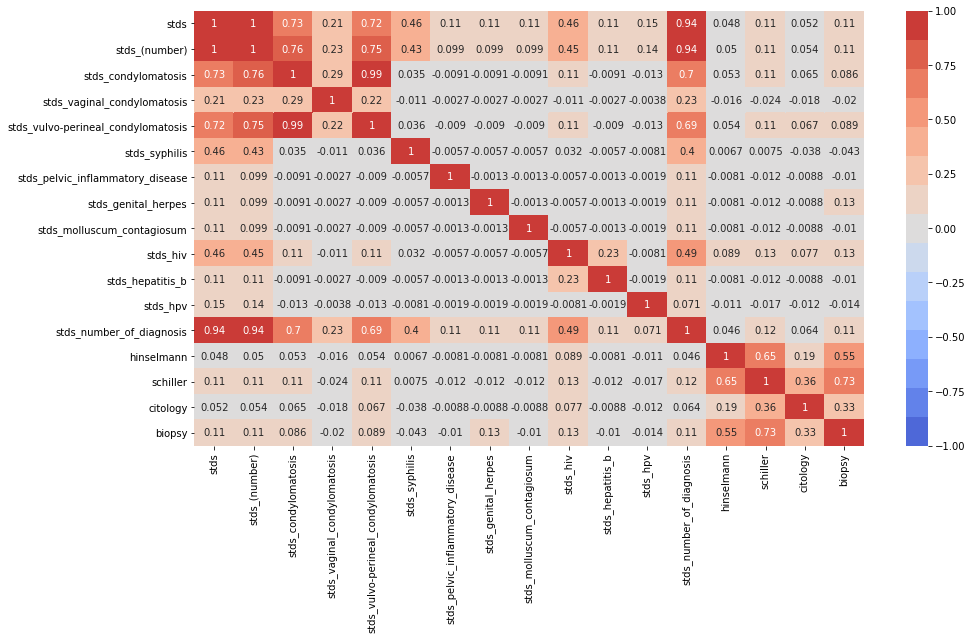

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_stds.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("coolwarm", 15))
plt.show()

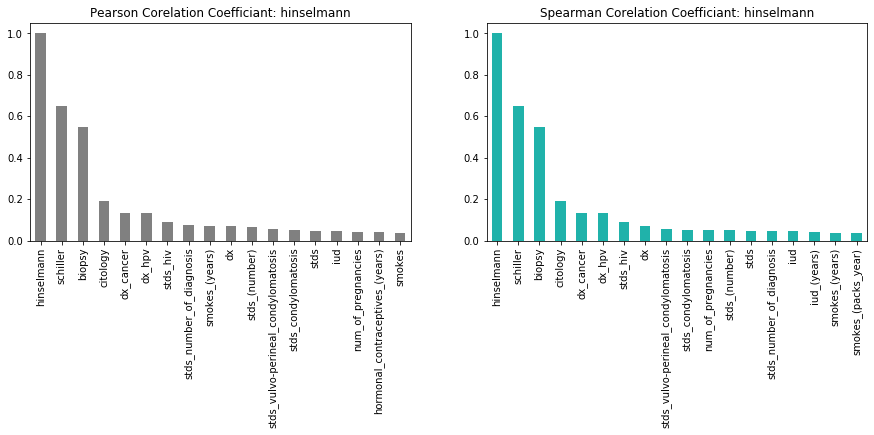

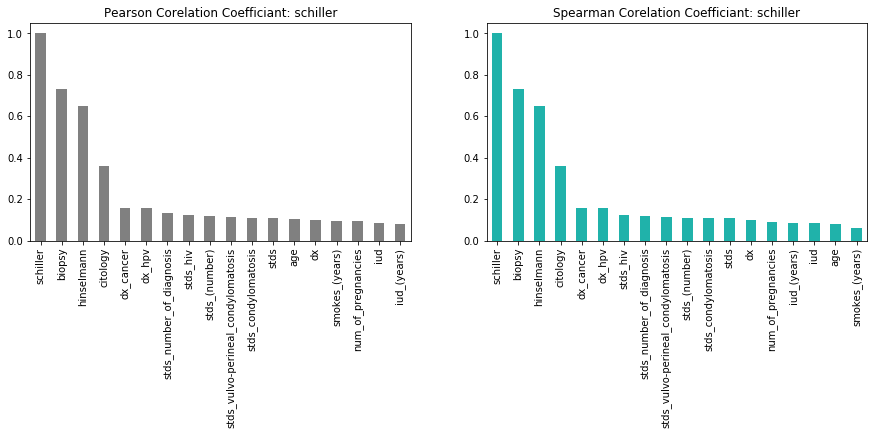

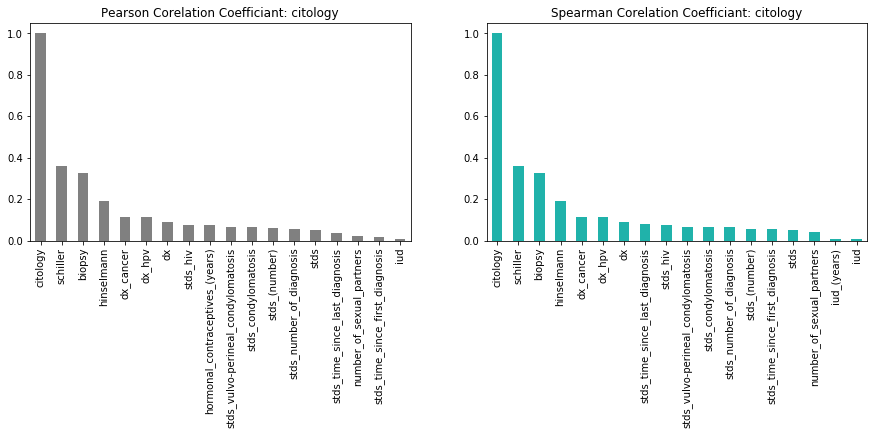

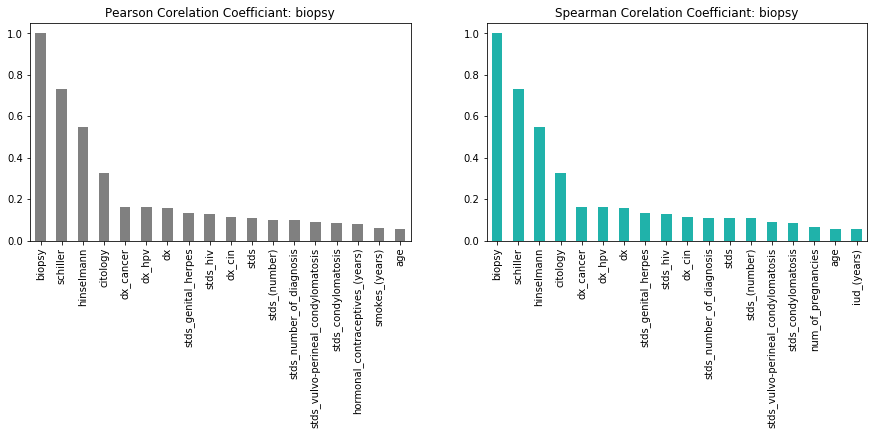

In [24]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(':', '_').str.replace('/', '_').str.replace('__', '_')
df.replace('?', np.NaN, inplace=True)
df = df.apply(pd.to_numeric) 

cols = ["hinselmann",
"schiller",
"citology",
"biopsy"]

for col in cols:
        
    plt.figure(figsize=(15, 4))
    plt.subplot(1,2,1)
    df.corr(method='pearson')[col].nlargest(18).plot(kind='bar', color = 'gray')
    plt.title('Pearson Corelation Coefficiant: {}'.format(col))

    plt.subplot(1,2,2)
    df.corr(method='spearman')[col].nlargest(18).plot(kind='bar', color = 'lightseagreen')
    plt.title('Spearman Corelation Coefficiant: {}'.format(col))
    plt.show()